In [1]:
##################
#####################
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          path=None):
    '''
    ###############################################################################################
    CITATION: taken from: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
    ###############################################################################################
    
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sn.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    
    if path:
        plt.tight_layout()
        plt.savefig(path)


# plot different version of consensus graphs
def create_sequence_logo(df, color_scheme=None, ax=None, title=None):
    '''
    Produce Consensus plot.
    '''
    if color_scheme == None:
        color_scheme={"*":"black",
                      "T": "red",
                      "A":"green",
                      "C":"blue",
                      "G":"orange"}
    else:
        color_scheme = color_scheme
    
    if ax == None:
        crp_logo = logomaker.Logo(df,
                                  shade_below=.5,
                                  fade_below=.5,
                                  font_name='Arial Rounded MT Bold', 
                                  color_scheme=color_scheme)
        # style using Logo methods
        crp_logo.style_spines(visible=False)
        crp_logo.style_spines(spines=['left', 'bottom'], visible=True)

        # style using Axes methods
        crp_logo.ax.set_ylabel("Frequency", labelpad=-1)
        crp_logo.ax.xaxis.set_ticks_position('none')
        crp_logo.ax.xaxis.set_tick_params(pad=-1)
        plt.title(title)

In [2]:
output_folder = "/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results_CNN_inference/a549"

In [3]:
# load predictions and bonafide WT1/KO1
wt1_preds = pd.read_table(os.path.join(output_folder, "SRR12492043.SRR12492044.control.outTable_773331943.gz.predictions.tsv"))
print(wt1_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/a549/SRR12492043.SRR12492044.control.outTable_773331943.gz_vs_SRR12492025.SRR12492026.siADARs.outTable_302610513.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko1_preds = pd.read_table(os.path.join(output_folder, "SRR12492025.SRR12492026.siADARs.outTable_302610513.gz.predictions.tsv"))
print(ko1_preds.shape)
wt1_preds = pd.merge(bonafide, wt1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["region", "position"], how="inner")
print(wt1_preds.shape)
ko1_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko1_preds, left_on=["ko_Region", "ko_Position"],
                     right_on=["region", "position"], how="inner")
print(ko1_preds.shape)
couple1_preds = pd.concat([wt1_preds, ko1_preds], ignore_index=True)
couple1_preds["couple"] = "couple1"
couple1_preds

(22487, 11)
(8820, 38)
(17393, 11)
(3258, 49)
(1192, 49)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Strand,FreqAGrna,start,stop,int_len,TabixLen,snp_proba,ed_proba,y_hat,couple
0,chrX,216336,A,1,412,57.78,"[407, 0, 5, 0]",AG,0.01,chrX,...,1,0.012136,216286.0,216386.0,101.0,101,1.972649e-17,1.000000e+00,1,couple1
1,chrX,216344,A,1,415,58.81,"[405, 0, 10, 0]",AG,0.02,chrX,...,1,0.024096,216294.0,216394.0,101.0,101,2.449699e-16,1.000000e+00,1,couple1
2,chrX,216345,A,1,414,58.62,"[343, 0, 71, 0]",AG,0.17,chrX,...,1,0.171498,216295.0,216395.0,101.0,101,1.303830e-12,1.000000e+00,1,couple1
3,chrX,216369,A,1,449,59.77,"[442, 0, 7, 0]",AG,0.02,chrX,...,1,0.015590,216319.0,216419.0,101.0,101,8.401744e-18,1.000000e+00,1,couple1
4,chrX,216802,A,1,421,52.88,"[416, 0, 5, 0]",AG,0.01,chrX,...,1,0.011876,216752.0,216852.0,101.0,101,5.097070e-15,1.000000e+00,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,chr8,144992103,A,0,1033,48.26,"[589, 0, 444, 0]",AG,0.43,chr8,...,0,0.444931,144992053.0,144992153.0,101.0,101,9.997918e-01,2.082684e-04,0,couple1
4446,chr8,144992361,A,0,860,52.48,"[476, 0, 384, 0]",AG,0.45,chr8,...,0,0.422656,144992311.0,144992411.0,101.0,101,8.322269e-01,1.677730e-01,0,couple1
4447,chr8,145665516,A,0,71,47.69,"[1, 0, 70, 0]",AG,0.99,chr8,...,0,0.983607,145665466.0,145665566.0,101.0,101,1.000000e+00,7.899548e-10,0,couple1
4448,chr8,145677011,A,0,126,47.74,"[0, 0, 126, 0]",AG,1.00,chr8,...,0,1.000000,145676961.0,145677061.0,101.0,101,1.000000e+00,1.328474e-08,0,couple1


In [4]:
# load predictions and bonafide WT2/KO2
wt2_preds = pd.read_table(os.path.join(output_folder, "SRR12492045.SRR12492046.control.outTable_535670354.gz.predictions.tsv"))
print(wt2_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/a549/SRR12492045.SRR12492046.control.outTable_535670354.gz_vs_SRR12492027.SRR12492028.siADARs.outTable_396704193.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko2_preds = pd.read_table(os.path.join(output_folder, "SRR12492027.SRR12492028.siADARs.outTable_396704193.gz.predictions.tsv"))
print(ko2_preds.shape)
wt2_preds = pd.merge(bonafide, wt2_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["region", "position"], how="inner")
print(wt2_preds.shape)
ko2_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko2_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["region", "position"], how="inner")
print(ko2_preds.shape)
couple2_preds = pd.concat([wt2_preds, ko2_preds], ignore_index=True)
couple2_preds["couple"] = "couple2"
couple2_preds

(23053, 11)
(9323, 38)
(17498, 11)
(3360, 49)
(1204, 49)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Strand,FreqAGrna,start,stop,int_len,TabixLen,snp_proba,ed_proba,y_hat,couple
0,chrX,216330,A,1,333,58.50,"[315, 0, 18, 0]",AG,0.05,chrX,...,1,0.054054,216280.0,216380.0,101.0,101,1.360553e-16,1.000000e+00,1,couple2
1,chrX,216336,A,1,346,58.01,"[339, 0, 7, 0]",AG,0.02,chrX,...,1,0.020231,216286.0,216386.0,101.0,101,3.862921e-18,1.000000e+00,1,couple2
2,chrX,216344,A,1,362,58.23,"[355, 0, 7, 0]",AG,0.02,chrX,...,1,0.019337,216294.0,216394.0,101.0,101,1.927143e-18,1.000000e+00,1,couple2
3,chrX,216369,A,1,374,57.27,"[369, 0, 5, 0]",AG,0.01,chrX,...,1,0.013369,216319.0,216419.0,101.0,101,3.557212e-17,1.000000e+00,1,couple2
4,chrX,216376,A,1,383,57.56,"[379, 0, 4, 0]",AG,0.01,chrX,...,1,0.010444,216326.0,216426.0,101.0,101,8.957891e-16,1.000000e+00,1,couple2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,chr8,144991176,A,0,1475,49.19,"[845, 0, 630, 0]",AG,0.43,chr8,...,0,0.458894,144991126.0,144991226.0,101.0,101,9.999572e-01,4.277952e-05,0,couple2
4560,chr8,144992103,A,0,964,48.44,"[544, 0, 420, 0]",AG,0.44,chr8,...,0,0.443824,144992053.0,144992153.0,101.0,101,9.997225e-01,2.774241e-04,0,couple2
4561,chr8,145665516,A,0,96,47.65,"[3, 0, 93, 0]",AG,0.97,chr8,...,0,0.964286,145665466.0,145665566.0,101.0,101,1.000000e+00,2.522951e-10,0,couple2
4562,chr8,145677011,A,0,149,48.46,"[0, 0, 149, 0]",AG,1.00,chr8,...,0,1.000000,145676961.0,145677061.0,101.0,101,1.000000e+00,1.591413e-08,0,couple2


In [5]:
# load predictions and bonafide WT3/KO3
wt3_preds = pd.read_table(os.path.join(output_folder, "SRR12492047.SRR12492048.control.outTable_192318299.gz.predictions.tsv"))
print(wt3_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/a549/SRR12492047.SRR12492048.control.outTable_192318299.gz_vs_SRR12492029.SRR12492030.siADARs.outTable_436061877.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko3_preds = pd.read_table(os.path.join(output_folder, "SRR12492029.SRR12492030.siADARs.outTable_436061877.gz.predictions.tsv"))
print(ko3_preds.shape)
wt3_preds = pd.merge(bonafide, wt3_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["region", "position"], how="inner")
print(wt3_preds.shape)
ko3_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko3_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["region", "position"], how="inner")
print(ko3_preds.shape)
couple3_preds = pd.concat([wt3_preds, ko3_preds], ignore_index=True)
couple3_preds["couple"] = "couple3"
couple3_preds

(24893, 11)
(8825, 38)
(15510, 11)
(3093, 49)
(1036, 49)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Strand,FreqAGrna,start,stop,int_len,TabixLen,snp_proba,ed_proba,y_hat,couple
0,chrX,216330,A,1,419,57.22,"[403, 0, 16, 0]",AG,0.04,chrX,...,1,0.038186,216280.0,216380.0,101.0,101,2.392456e-18,1.000000e+00,1,couple3
1,chrX,216336,A,1,431,56.97,"[422, 0, 9, 0]",AG,0.02,chrX,...,1,0.020882,216286.0,216386.0,101.0,101,1.911848e-17,1.000000e+00,1,couple3
2,chrX,216344,A,1,443,57.55,"[434, 0, 9, 0]",AG,0.02,chrX,...,1,0.020316,216294.0,216394.0,101.0,101,4.171945e-16,1.000000e+00,1,couple3
3,chrX,216369,A,1,495,57.02,"[489, 0, 6, 0]",AG,0.01,chrX,...,1,0.012121,216319.0,216419.0,101.0,101,2.558363e-18,1.000000e+00,1,couple3
4,chrX,216376,A,1,489,58.86,"[482, 0, 7, 0]",AG,0.01,chrX,...,1,0.014315,216326.0,216426.0,101.0,101,1.691085e-17,1.000000e+00,1,couple3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,chr8,144991176,A,0,1650,49.04,"[913, 0, 737, 0]",AG,0.45,chr8,...,0,0.429977,144991126.0,144991226.0,101.0,101,9.999592e-01,4.072983e-05,0,couple3
4125,chr8,144992103,A,0,1178,48.23,"[670, 0, 508, 0]",AG,0.43,chr8,...,0,0.440307,144992053.0,144992153.0,101.0,101,9.999850e-01,1.503670e-05,0,couple3
4126,chr8,144992361,A,0,1099,50.93,"[604, 0, 495, 0]",AG,0.45,chr8,...,0,0.398207,144992311.0,144992411.0,101.0,101,9.453784e-01,5.462165e-02,0,couple3
4127,chr8,145677011,A,0,182,46.22,"[0, 0, 182, 0]",AG,1.00,chr8,...,0,1.000000,145676961.0,145677061.0,101.0,101,1.000000e+00,8.001608e-09,0,couple3


In [6]:
# merge prediction into a unique list
merged_preds = pd.concat([couple1_preds, couple2_preds, couple3_preds], axis=0)
merged_preds

,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Strand,FreqAGrna,start,stop,int_len,TabixLen,snp_proba,ed_proba,y_hat,couple
0,chrX,216336,A,1,412,57.78,"[407, 0, 5, 0]",AG,0.01,chrX,...,1,0.012136,216286.0,216386.0,101.0,101,1.972649e-17,1.000000e+00,1,couple1
1,chrX,216344,A,1,415,58.81,"[405, 0, 10, 0]",AG,0.02,chrX,...,1,0.024096,216294.0,216394.0,101.0,101,2.449699e-16,1.000000e+00,1,couple1
2,chrX,216345,A,1,414,58.62,"[343, 0, 71, 0]",AG,0.17,chrX,...,1,0.171498,216295.0,216395.0,101.0,101,1.303830e-12,1.000000e+00,1,couple1
3,chrX,216369,A,1,449,59.77,"[442, 0, 7, 0]",AG,0.02,chrX,...,1,0.015590,216319.0,216419.0,101.0,101,8.401744e-18,1.000000e+00,1,couple1
4,chrX,216802,A,1,421,52.88,"[416, 0, 5, 0]",AG,0.01,chrX,...,1,0.011876,216752.0,216852.0,101.0,101,5.097070e-15,1.000000e+00,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,chr8,144991176,A,0,1650,49.04,"[913, 0, 737, 0]",AG,0.45,chr8,...,0,0.429977,144991126.0,144991226.0,101.0,101,9.999592e-01,4.072983e-05,0,couple3
4125,chr8,144992103,A,0,1178,48.23,"[670, 0, 508, 0]",AG,0.43,chr8,...,0,0.440307,144992053.0,144992153.0,101.0,101,9.999850e-01,1.503670e-05,0,couple3
4126,chr8,144992361,A,0,1099,50.93,"[604, 0, 495, 0]",AG,0.45,chr8,...,0,0.398207,144992311.0,144992411.0,101.0,101,9.453784e-01,5.462165e-02,0,couple3
4127,chr8,145677011,A,0,182,46.22,"[0, 0, 182, 0]",AG,1.00,chr8,...,0,1.000000,145676961.0,145677061.0,101.0,101,1.000000e+00,8.001608e-09,0,couple3


In [7]:
# save to disk full predictions
merged_preds.to_csv(os.path.join(output_folder, "MERGED_PREDS.tsv"), sep="\t", index=None)

In [8]:
print(classification_report(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6856
           1       0.92      1.00      0.96      6287

    accuracy                           0.96     13143
   macro avg       0.96      0.96      0.96     13143
weighted avg       0.96      0.96      0.96     13143



In [9]:
print("Accuracy:", accuracy_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("Balanced Accuracy:", balanced_accuracy_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("Precision:", precision_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("Recall:", recall_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("F1-score", f1_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
cm = confusion_matrix(merged_preds["Class_binary"].values, merged_preds["y_hat"].values)
print(cm)

Accuracy: 0.9602069542722361
Balanced Accuracy: 0.9617988230793887
Precision: 0.9243227326266196
Recall: 0.9985684746301893
F1-score 0.9600122333511736
[[6342  514]
 [   9 6278]]


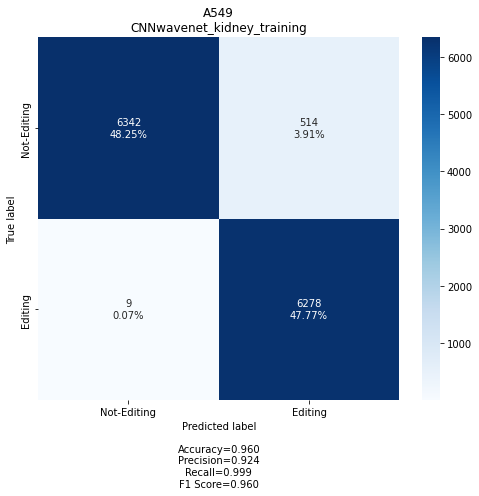

In [10]:
# confusion matrix
make_confusion_matrix(cf=cm,
                          group_names=None,
                          categories=["Not-Editing", "Editing"],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(7,7),
                          cmap='Blues',
                          title="A549\nCNNwavenet_kidney_training",
                          path=os.path.join(output_folder, "ConfMatr.tiff"))